In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
X_train = np.load("/content/drive/MyDrive/BootCamps/X_train.npy")
y_train = np.load("/content/drive/MyDrive/BootCamps/y_train.npy")
X_val = np.load("/content/drive/MyDrive/BootCamps/X_val.npy")
y_val = np.load("/content/drive/MyDrive/BootCamps/y_val.npy")
X_test = np.load("/content/drive/MyDrive/BootCamps/X_test.npy")
y_test = np.load("/content/drive/MyDrive/BootCamps/y_test.npy")

In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

final = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val))



Epoch 1/50
55/55 [==============================] - 20s 339ms/step - loss: 2.1227 - accuracy: 0.2103 - val_loss: 1.8147 - val_accuracy: 0.3700
Epoch 2/50
55/55 [==============================] - 19s 351ms/step - loss: 1.7964 - accuracy: 0.3341 - val_loss: 1.4176 - val_accuracy: 0.5384
Epoch 3/50
55/55 [==============================] - 13s 229ms/step - loss: 1.5981 - accuracy: 0.4248 - val_loss: 1.2506 - val_accuracy: 0.5659
Epoch 4/50
55/55 [==============================] - 15s 266ms/step - loss: 1.4586 - accuracy: 0.4829 - val_loss: 1.1688 - val_accuracy: 0.6094
Epoch 5/50
55/55 [==============================] - 16s 284ms/step - loss: 1.3552 - accuracy: 0.5250 - val_loss: 1.0366 - val_accuracy: 0.6873
Epoch 6/50
55/55 [==============================] - 15s 273ms/step - loss: 1.2461 - accuracy: 0.5735 - val_loss: 0.9396 - val_accuracy: 0.7503
Epoch 7/50
55/55 [==============================] - 15s 280ms/step - loss: 1.1635 - accuracy: 0.6083 - val_loss: 0.8696 - val_accuracy: 0.7491

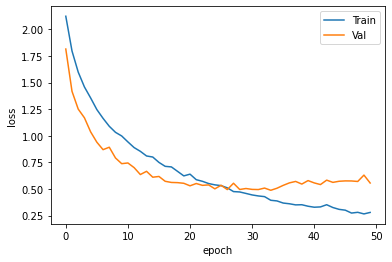

In [10]:
plt.plot(final.history["loss"], label = "Train")
plt.plot(final.history["val_loss"], label = "Val")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

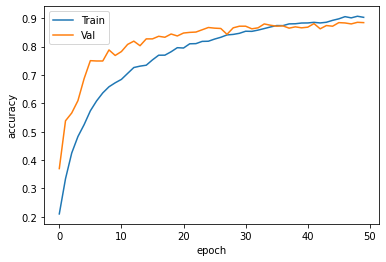

In [11]:
plt.plot(final.history["accuracy"], label = "Train")
plt.plot(final.history["val_accuracy"], label = "Val")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 18ms/step - loss: 0.5207 - accuracy: 0.8661


[0.5206901431083679, 0.8661327362060547]

In [13]:
test_result = model.test_on_batch(X_test, y_test)
print(test_result)

[0.5206900238990784, 0.8661327362060547]


In [19]:
prediction_result = model.predict(X_test[320].reshape(1,32,32,1))
prediction_result

array([[9.1077901e-21, 2.6512293e-26, 7.0850908e-11, 1.0000000e+00,
        1.0066371e-14, 1.4008502e-20, 1.2044931e-21, 1.2046273e-27,
        3.5675435e-15, 1.5132922e-15]], dtype=float32)

In [20]:
predicted_class = prediction_result.argmax()
predicted_probability = prediction_result.max()

Image class 3 with 1.0 probability.


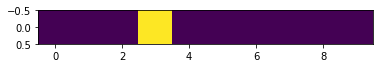

In [22]:
print(f"Image class {predicted_class} with {predicted_probability} probability.")
plt.imshow(prediction_result)